In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
diam = pd.read_csv('../cleaned-data/01-diamonds-train-cl.csv')
diam_test = pd.read_csv('../cleaned-data/01-diamonds-test-cl.csv')

In [4]:
display(diam.head())
diam.describe()
print(diam.shape, diam_test.shape)
diam.dtypes

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,3,5,0,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,4,7,1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,4,5,1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,4,6,2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,4,1,1,61.4,55.0,5.58,5.62,3.44,1276


(40345, 11) (13449, 10)


id           int64
carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [5]:
diam_corr = diam.corr()
diam_corr

,id,carat,cut,color,clarity,depth,table,x,y,z,price
id,1.000000,0.001804,-0.002551,0.001494,-0.002441,-0.003035,0.004436,0.003238,0.002021,0.002507,0.001823
carat,0.001804,1.000000,-0.132754,-0.291382,-0.040854,0.023118,0.181725,0.976267,0.945757,0.968685,0.922345
cut,-0.002551,-0.132754,1.000000,0.018865,0.040908,-0.213022,-0.432025,-0.124552,-0.119245,-0.149094,-0.053086
color,0.001494,-0.291382,0.018865,1.000000,0.011880,-0.044171,-0.026576,-0.270998,-0.262095,-0.273173,-0.173932
clarity,-0.002441,-0.040854,0.040908,0.011880,1.000000,-0.004216,-0.032344,-0.060480,-0.060030,-0.061368,-0.040825
depth,-0.003035,0.023118,-0.213022,-0.044171,-0.004216,1.000000,-0.299534,-0.028765,-0.032894,0.092482,-0.013307
table,0.004436,0.181725,-0.432025,-0.026576,-0.032344,-0.299534,1.000000,0.195775,0.182559,0.154399,0.126545
x,0.003238,0.976267,-0.124552,-0.270998,-0.060480,-0.028765,0.195775,1.000000,0.967143,0.985385,0.886168
y,0.002021,0.945757,-0.119245,-0.262095,-0.060030,-0.032894,0.182559,0.967143,1.000000,0.960350,0.860499
z,0.002507,0.968685,-0.149094,-0.273173,-0.061368,0.092482,0.154399,0.985385,0.960350,1.000000,0.876061


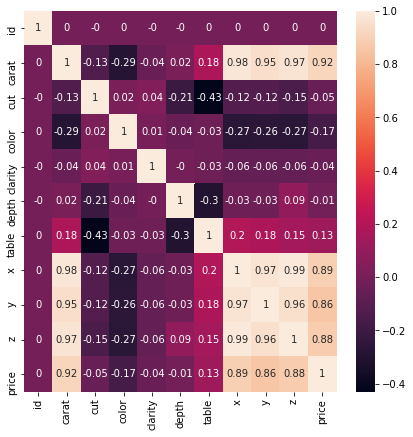

In [6]:
plt.figure(figsize=(7,7))
sns.heatmap(round(diam_corr,2), annot=True)

So a good first step would be to get rid of the x,y,z variables, since they have a very strong correlation among themselves, and with carat (i.e. weight)

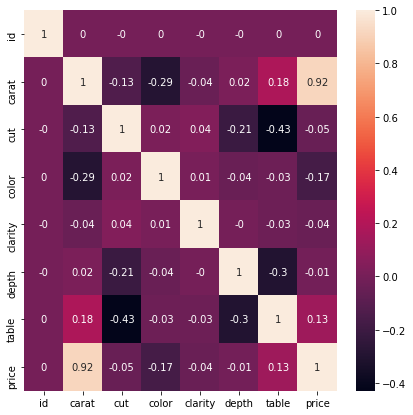

In [7]:
diam_red = diam.drop(columns=['x','y', 'z'])
diam_red_corr = diam_red.corr()
plt.figure(figsize=(7,7))
sns.heatmap(round(diam_red_corr,2), annot=True)

## Splitting the data

Another idea, is to split the dataset in two. We can see from the following price-distribution, that there are at least two groups of diamonds.

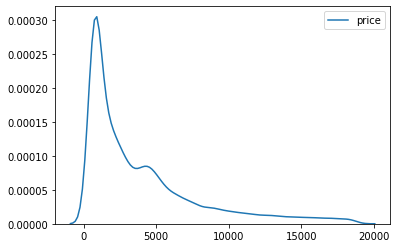

In [8]:
sns.kdeplot(diam.price)

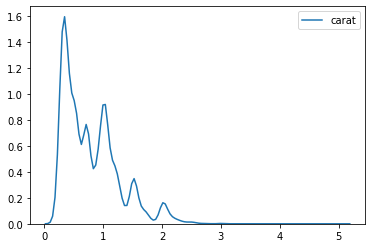

In [9]:
sns.kdeplot(diam.carat)

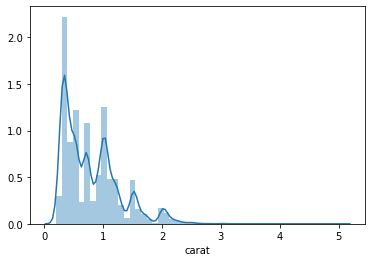

In [10]:
sns.distplot(diam.carat)

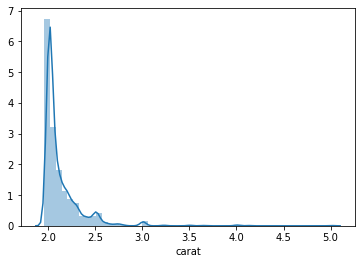

In [13]:
sns.distplot(diam.carat[diam.carat > 1.95])

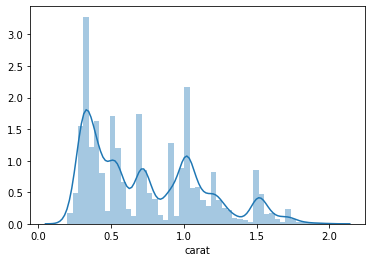

In [18]:
sns.distplot(diam.carat[diam.carat < 2])

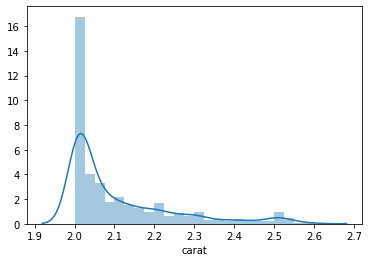

In [23]:
sns.distplot(diam.loc[(diam.carat >= 2) & (diam.carat <= 2.6)].carat)

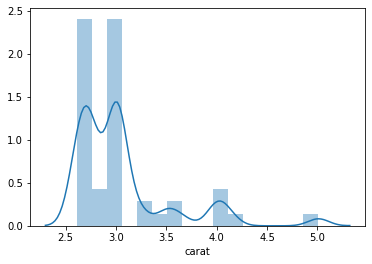

In [24]:
sns.distplot(diam.carat.loc[diam.carat > 2.6])

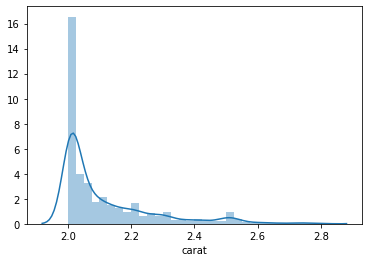

In [34]:
sns.distplot(diam.loc[(diam.carat >= 2.0) & (diam.carat <= 2.8)].carat)

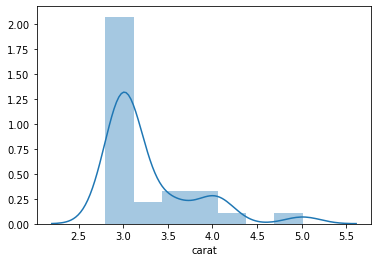

In [35]:
sns.distplot(diam.loc[(diam.carat >= 2.8) & (diam.carat <= 900)].carat)

A first idea would be to divide in two - below or equal 2 carats, and above two carats.

In [36]:
def splitFrame(df):
    df = df.drop(columns=['x','y','z'])
    dflow = df.loc[df.carat < 2.0]
    dfhigh = df.loc[df.carat >= 2.0]
    return dflow, dfhigh


train_low, train_high = splitFrame(diam)
test_low, test_high = splitFrame(diam_test)

In [41]:
test_low.head()

,id,carat,cut,color,clarity,depth,table
0,0,1.10,3,3,3,62.2,58.0
1,1,0.51,4,2,1,62.5,57.0
3,3,1.21,3,5,1,60.0,60.0
4,4,0.55,4,5,1,61.8,55.0
5,5,0.70,3,3,1,61.1,58.0


In [38]:
for e,i in zip([train_low, train_high, test_low, test_high], ["train_low", "train_high", "test_low", "test_high"]):
    e.to_csv(f'../cleaned-data/03-{i}.csv', index=False)

In [39]:
test_low.dtypes

id           int64
carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
dtype: object

## Trying different approaches

Our initial results with the split model were not an improvement of the earlier model. We changed multiple variables at once however - we both removed collinear variables and split the dataset. We come back here to readd the variables x,y,z, to see if this was the cause of the discrepancy

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
def splitFrame(df):
    dflow = df.loc[df.carat < 2.0]
    dfhigh = df.loc[df.carat >= 2.0]
    return dflow, dfhigh

def splitFrameDropXYZ(df):
    df = df.drop(columns=['x','y','z'])
    dflow = df.loc[df.carat < 2.0]
    dfhigh = df.loc[df.carat >= 2.0]
    return dflow, dfhigh

In [62]:
diamTrainCompl = pd.read_csv('../cleaned-data/01-diamonds-train-cl.csv')
diamTestCompl = pd.read_csv('../cleaned-data/01-diamonds-test-cl.csv')

train_low, train_high = splitFrame(diamTrainCompl)
test_low, test_high = splitFrame(diamTestCompl)

In [56]:
scaler = MinMaxScaler()
pd.DataFrame(scaler.fit_transform(train_low), columns=train_low.columns)

,id,carat,cut,color,clarity,depth,table,price
0,0.000000,0.324022,0.75,0.666667,0.000000,0.513889,0.416667,0.168831
1,0.000025,0.061453,1.00,1.000000,0.142857,0.494444,0.361111,0.021970
2,0.000050,0.055866,1.00,0.666667,0.142857,0.536111,0.305556,0.008063
3,0.000074,0.469274,1.00,0.833333,0.285714,0.527778,0.416667,0.499242
4,0.000099,0.251397,1.00,0.000000,0.142857,0.511111,0.333333,0.051407
...,...,...,...,...,...,...,...,...
38725,0.999901,0.167598,1.00,0.833333,0.000000,0.525000,0.361111,0.075216
38726,0.999926,0.072626,1.00,1.000000,0.571429,0.522222,0.361111,0.024621
38727,0.999950,0.111732,0.75,0.500000,0.857143,0.513889,0.416667,0.043128
38728,0.999975,0.480447,1.00,0.166667,0.000000,0.505556,0.388889,0.288149


In [63]:
for e,i in zip([train_low, train_high, test_low, test_high], ["train_low", "train_high", "test_low", "test_high"]):
    e.to_csv(f'../cleaned-data/04-{i}-catAsInt-withXYZ.csv', index=False)

Another approach we have not yet tried with the split dataset is to use categorical variables as dummies instead of integers, so we will prep the data for that as well here.

In [73]:
diamTrainCompl = pd.read_csv('../cleaned-data/02_diamonds_train_alldummies.csv')
diamTestCompl = pd.read_csv('../cleaned-data/02_diamonds_test_alldummies.csv')

train_low, train_high = splitFrame(diamTrainCompl)
test_low, test_high = splitFrame(diamTestCompl)

In [74]:
for e,i in zip([train_low, train_high, test_low, test_high], ["train_low", "train_high", "test_low", "test_high"]):
    e.to_csv(f'../cleaned-data/05-{i}-catAsDummies-withXYZ.csv', index=False)

Similarly, we should also have dataset with dummies, and without x, y, z variables to test out.

In [75]:
diamTrainDumXYZdrop = pd.read_csv('../cleaned-data/02_diamonds_train_alldummies.csv')
diamTestDumXYZdrop = pd.read_csv('../cleaned-data/02_diamonds_test_alldummies.csv')

In [76]:
train_low, train_high = splitFrameDropXYZ(diamTrainDumXYZdrop)
test_low, test_high = splitFrameDropXYZ(diamTestDumXYZdrop)

In [77]:
for e,i in zip([train_low, train_high, test_low, test_high], ["train_low", "train_high", "test_low", "test_high"]):
    e.to_csv(f'../cleaned-data/06-{i}-catAsDummies-droppedXYZ.csv', index=False)

## Combining several methods

We want to try a model where we comebine some of the earlier methods:
- Split the dataset in two by carat
- Use an int scale for color
- Use dummies for clarity and cut

In [9]:
diamTrainCombIntAndDum = pd.read_csv('../cleaned-data/07_diamonds_train_colorAsInt_othersAsDummies.csv')
diamTestCombIntAndDum = pd.read_csv('../cleaned-data/07_diamonds_test_colorAsInt_othersAsDummies.csv')
train_low, train_high = splitFrame(diamTrainCombIntAndDum)
test_low, test_high = splitFrame(diamTestCombIntAndDum)

In [10]:
for e,i in zip([train_low, train_high, test_low, test_high], ["train_low", "train_high", "test_low", "test_high"]):
    e.to_csv(f'../cleaned-data/08-{i}-colorAsInt-restAsDummies.csv', index=False)

In [25]:
def splitFrame3(df):
    dflow = df.loc[df.carat < 2.0]
    dfmid = df.loc[(df.carat >= 2) & (df.carat <= 2.6)]
    dfhigh = df.loc[df.carat > 2.6]
    return dflow, dfmid, dfhigh


In [26]:
threeWaySplitTrain = pd.read_csv('../cleaned-data/02_diamonds_train_alldummies.csv')
threeWaySplitTest = pd.read_csv('../cleaned-data/02_diamonds_test_alldummies.csv')

In [27]:
trainLow, trainMid, trainHigh = splitFrame3(threeWaySplitTrain)

In [28]:
trainLow

,id,carat,depth,table,x,y,z,cut_0,cut_1,cut_2,...,color_7,clarity_0,clarity_1,clarity_2,clarity_3,clarity_4,clarity_5,clarity_6,clarity_7,price
0,0,0.78,61.5,58.0,5.93,5.98,3.66,0,0,0,...,0,1,0,0,0,0,0,0,0,3446
1,1,0.31,60.8,56.0,4.37,4.32,2.64,0,0,0,...,1,0,1,0,0,0,0,0,0,732
2,2,0.30,62.3,54.0,4.30,4.34,2.69,0,0,0,...,0,0,1,0,0,0,0,0,0,475
3,3,1.04,62.0,58.0,6.54,6.46,4.03,0,0,0,...,0,0,0,1,0,0,0,0,0,9552
4,4,0.65,61.4,55.0,5.58,5.62,3.44,0,0,0,...,0,0,1,0,0,0,0,0,0,1276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40340,40340,0.50,61.9,56.0,5.09,5.12,3.16,0,0,0,...,0,1,0,0,0,0,0,0,0,1716
40341,40341,0.33,61.8,56.0,4.40,4.44,2.73,0,0,0,...,1,0,0,0,0,1,0,0,0,781
40342,40342,0.40,61.5,58.0,4.69,4.74,2.90,0,0,0,...,0,0,0,0,0,0,0,1,0,1123
40343,40343,1.06,61.2,57.0,6.59,6.56,4.03,0,0,0,...,0,1,0,0,0,0,0,0,0,5651


In [29]:
testLow, testMid, testHigh = splitFrame3(threeWaySplitTest)

In [30]:
testLow

,id,carat,depth,table,x,y,z,cut_0,cut_1,cut_2,...,color_6,color_7,clarity_0,clarity_1,clarity_2,clarity_3,clarity_4,clarity_5,clarity_6,clarity_7
0,0,1.10,62.2,58.0,6.69,6.60,4.13,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0.51,62.5,57.0,5.07,5.10,3.18,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,1.21,60.0,60.0,6.96,6.91,4.16,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4,0.55,61.8,55.0,5.27,5.22,3.24,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,5,0.70,61.1,58.0,5.74,5.79,3.52,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13444,13444,0.30,60.0,58.0,4.37,4.40,2.63,0,0,0,...,1,0,0,0,0,0,1,0,0,0
13445,13445,0.55,60.8,56.0,5.31,5.34,3.24,0,0,0,...,0,1,0,0,1,0,0,0,0,0
13446,13446,0.23,61.3,58.0,3.94,3.96,2.42,0,0,1,...,1,0,0,0,0,0,0,0,1,0
13447,13447,0.30,61.4,58.0,4.29,4.31,2.64,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [36]:
from varname import varname

In [44]:
names = ['trainLow', 'trainMid', 'trainHigh', 'testLow', 'testMid', 'testHigh']
for e, name in zip([trainLow, trainMid, trainHigh, testLow, testMid, testHigh], names):
    e.to_csv(f'../cleaned-data/09-{name}allCatAsDummies-split3Way.csv', index=False)